In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [15]:
df = pd.read_csv('all_data.csv')

In [16]:
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [18]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [19]:
#Rename columns of the database to be simple
df = df.rename(columns = {"Country" : 'country', 'Year': 'year', "Life expectancy at birth (years)" : 'life_expectency', 'GDP': 'gdp'})

In [63]:
df['country'] = df['country'].replace('United States of America', 'USA')
countrys_names= df['country'].unique()
print(countrys_names)

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


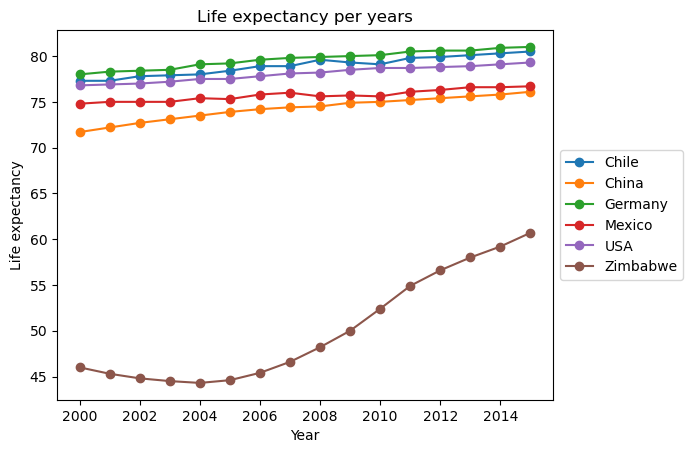

In [64]:
#Has life expectancy increased over time in the six nations?
for country in countrys_names:
    df_country= df[df.country == country]
    plt.plot(df_country.year, df_country.life_expectency, marker = 'o', label= country)
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy per years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

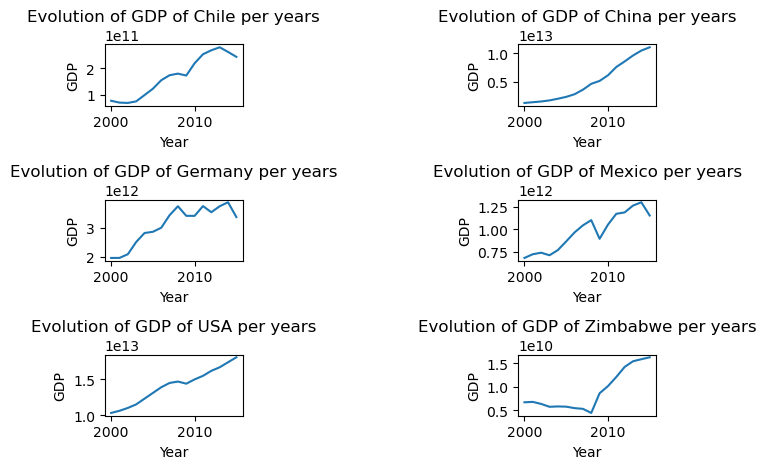

In [65]:
#Has GDP increased over time in the six nations?
for (i, country) in zip(range(1, len(countrys_names)+1),countrys_names):
    df_country= df[df.country == country]
    plt.subplot(3, 2, i)
    plt.plot(df_country.year, df_country.gdp)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('Evolution of GDP of ' + country + ' per years')
plt.tight_layout()
plt.subplots_adjust(wspace=2)  # hspace = vertical space
plt.show()

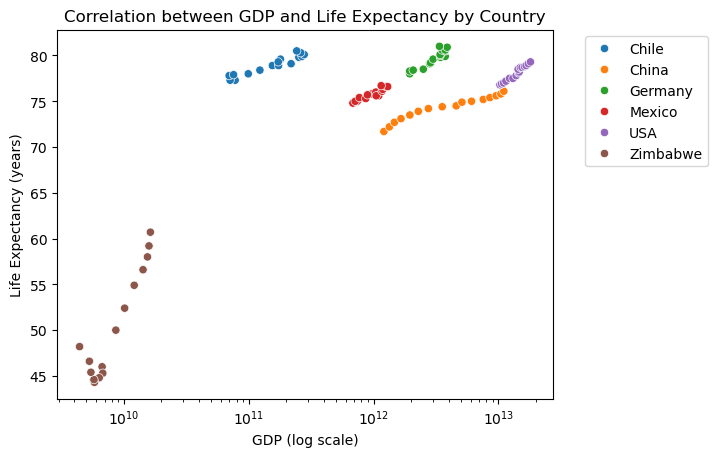

In [66]:
#Is there a correlation between GDP and life expectancy of a country?
sns.scatterplot(x= 'gdp', y= 'life_expectency', data= df,  hue= 'country')
plt.xscale('log')
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy (years)')
plt.title('Correlation between GDP and Life Expectancy by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [67]:
#What is the average life expectancy in these nations?
mean_life_expectancy =df.groupby('country').life_expectency.mean().reset_index()
mean_life_expectancy

,country,life_expectency
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,USA,78.06250
5,Zimbabwe,50.09375


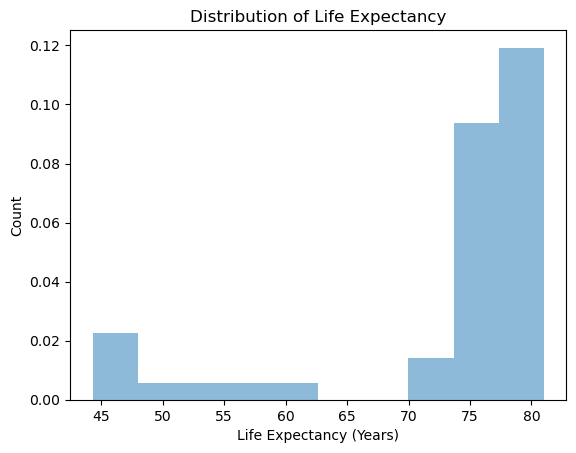

In [77]:
#What is the distribution of that life expectancy?
plt.hist(df.life_expectency, alpha= 0.5, density= True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Count')
plt.show()

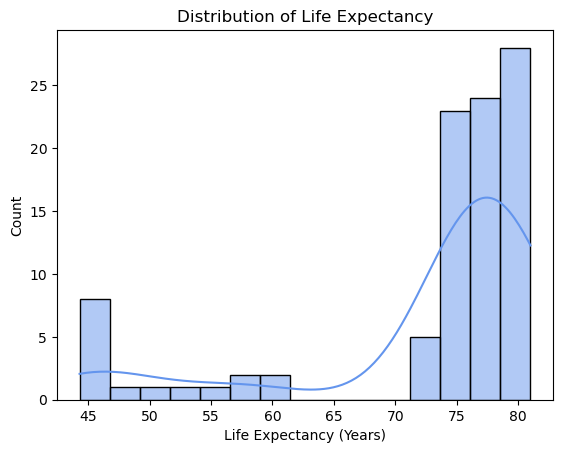

In [75]:
sns.histplot(df.life_expectency, kde=True, bins=15, color='cornflowerblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Count')
plt.show()


In [94]:
#Which countries had the highest and lowest life expectancy each year?
df.loc[df.groupby('year')['life_expectency'].idxmin()]


,country,year,life_expectency,gdp
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09


In [93]:
df.loc[df.groupby('year')['life_expectency'].idxmax()]


,country,year,life_expectency,gdp
32,Germany,2000,78.0,1.949950e+12
33,Germany,2001,78.3,1.950650e+12
34,Germany,2002,78.4,2.079140e+12
35,Germany,2003,78.5,2.505730e+12
36,Germany,2004,79.1,2.819250e+12
37,Germany,2005,79.2,2.861410e+12
38,Germany,2006,79.6,3.002450e+12
39,Germany,2007,79.8,3.439950e+12
40,Germany,2008,79.9,3.752370e+12
41,Germany,2009,80.0,3.418010e+12
